# <center>L2 Computational Physics</center>
---

## Week 5: Monte Carlo Methods

In this notebook, you will simulate a system with of three nuclei $A$, $B$ and $C$ where $A$ decays into $B$ and $B$ decays into $C$. If exposed to a neutron flux nucleus $C$ can be activated into a nucleus $A$. 

In [1]:
import numpy
from matplotlib import pyplot as plt
import random

Implement a function that tells whether a transition has occured, based on the transition probability and a random number. Use the random number `r` from `random.random()` and use the procedure described in the notes so that the checks can work in a reproducible way.

In [2]:
def has_transitioned(prob):
    r = random.random()
    if r <= prob:
        return True
    else:
        return False

In [3]:
# this test is worth 1 mark
random.seed(9867)
assert [ has_transitioned(0.5) for i in range(10)] == [False, False, True, False, False, False, False, True, False, True]

We are going to keep track of the state of the atoms using a either `'A'`, `'B'` or `'C'` for each nucleus. For example 
```python
state = ['A', 'A', 'B', 'A', 'C']
```

We will capture the possible physical reaction in a list of allowed transitions such as

`('A', 'B', 0.25 )`

where the first element is the initial state, the second element is the final state of the transition and its probability in the time interval considered is the third argument.

Define a function that takes as arguments the current state and a list of such transition rules and implements the transition (or not) and returns the new state

In [4]:
def evolveOne(currentState, rules):
    statelist = []
    for i in range(0,len(rules)):
        statelist.append(rules[i][0])
    rulestate = 0
    for i in range(0,len(rules)):
        if currentState == statelist[i]:
            rulestate = 1
    if rulestate == 1:
        for i in range(0,len(rules)):
            if currentState == rules[i][0]:
                a = has_transitioned(rules[i][2])
                if a == True:
                    return rules[i][1]
                else:
                    return rules[i][0]
    else:
        return currentState

In [5]:
# these tests are worth 1 mark
alwaysDecayRules = [
    ('A', 'B', 1.0),
    ('B', 'C', 1.0)
]
assert evolveOne('A', alwaysDecayRules) == 'B'
assert evolveOne('B', alwaysDecayRules) == 'C'

In [6]:
# these tests are worth 2 mark
random.seed(112211)
testRules = [
    ('A', 'B', 0.33),
    ('B', 'C', 0.75)
]
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'B'

assert evolveOne('B', testRules) == 'B'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'

# with no rules there should be no change
assert evolveOne('C', testRules) == 'C'


Now implement a function that takes a list of states and transition them according to the rules passed as argument. This function should return a new vector of states, it should not modify the state passed as an argument!

In [7]:
def evolveMany(states, rules):
    newState = []
    for i in range(0,len(states)):
        newState.append(evolveOne(states[i],rules))
    return newState

In [8]:
# these tests are worth 1 mark
random.seed(112287)
testRules = [
    ('A', 'B', 0.33),
    ('B', 'C', 0.75)
]
initialTestArray = ['A','B','C']*5
evolvedTest = evolveMany(initialTestArray, testRules)
targetArray = ['B', 'C', 'C', 'A', 'C', 'C', 'A', 'B', 'C', 'A', 'C', 'C', 'B', 'C', 'C'] 
assert evolvedTest == targetArray
# checks the initial array is left unchanged
assert initialTestArray == ['A','B','C']*5

Define a function that evolves a system that starts with initial amounts `NA`, `NB` and `NC` of $A$, $B$ and $C$ nuclei and evolved it in `n_timestep` from time $t=0$ to $t=t_{max}$. The function should return three arrays, one for each atom type, of the number of nuclei of that type at each time step. Each array should contain `n_timestep+1` elements including the initial amount. 
 

In [9]:
def evolve_system(NA, NB, NC, rules, n_step):
    state = (['A'] * NA)+(['B'] * NB)+(['C'] * NC)

    A_count = numpy.empty(n_step + 1, dtype=int)
    B_count = numpy.empty(n_step + 1, dtype=int)
    C_count = numpy.empty(n_step + 1, dtype=int)

    for i in range(0,n_step+1):
        A_count[i] = NA
        B_count[i] = NB
        C_count[i] = NC
        state = evolveMany(state,rules)
        NA = 0
        NB = 0
        NC = 0
        for i in range(0,len(state)):
            if state[i] == 'A':
                NA += 1
            elif state[i] == 'B':
                NB += 1
            elif state[i] == 'C':
                NC += 1
            else:
                print("No valid state")
    return A_count, B_count, C_count

In [10]:
# these tests are worth 2 marks
rules = [
    ('A', 'B', 0.0033),
    ('B', 'C', 0.0075),
    ('C', 'A', 0.009)
    
]

r1, r2, r3 = evolve_system(0,0,250, rules, 17)
assert len(r1) == 18
assert len(r2) == 18
assert len(r3) == 18

In [11]:
# these tests are worth 2 marks 
testrules = [
    ('A', 'B', 0.086),
    ('B', 'C', 0.075),
    ('C', 'A', 0.19)
    
]

random.seed(9485)
r1, r2, r3 = evolve_system(200,200,200, testrules, 20)
assert (r1 == [200, 213, 233, 250, 258, 251, 266, 263, 259, 260, 265, 259, 256,
        255, 258, 256, 259, 253, 249, 247, 253]).all()
assert (r2 == [200, 198, 201, 206, 205, 214, 214, 212, 216, 221, 225, 234, 236,
        238, 234, 235, 231, 245, 253, 256, 252]).all()
assert (r3 == [200, 189, 166, 144, 137, 135, 120, 125, 125, 119, 110, 107, 108,
        107, 108, 109, 110, 102,  98,  97,  95]).all()

## Plotting tasks

Create a plot with the number of $A$, $B$ and $C$ nuclei, starting with 250 $C$ nuclei and evolving the system for 100 hours using 200 steps and with neutron flux on. Evolve the system for another 100 hours (using 200 steps) without neutron flux (i.e. no transitions from $C$ to $A$).  

The half life of the $A$ atoms is 10.1 hours, the half life of $B$ nuclei is 15.7 hours and we can caracterise the rate of activation of $C$ into $A$ when the neutron flux is on with and effective half-life of 3.2 hours.

The plot should have the appropriate labels and legend. [8 marks]    




Text(0,0.5,'Number of atoms')

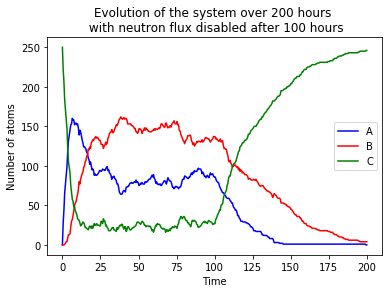

In [12]:
nsteps = 200
t_total = 100
t_half_A = 10.1
t_half_B = 15.7
t_half_C = 3.2
def prob_finder(t_half,time,steps):
    tau = t_half/(numpy.log(2))
    timestep = time/steps
    return (1/tau)*timestep
fluxrules = [
    ('A', 'B', prob_finder(t_half_A,t_total,nsteps)),
    ('B', 'C', prob_finder(t_half_B,t_total,nsteps)),
    ('C', 'A', prob_finder(t_half_C,t_total,nsteps))
]
nofluxrules = [
    ('A', 'B', prob_finder(t_half_A,t_total,nsteps)),
    ('B', 'C', prob_finder(t_half_B,t_total,nsteps)), 
]
xvalues = numpy.linspace(0,t_total*2,num=(nsteps*2)+2)
y1,y2,y3 = evolve_system(0,0,250, fluxrules, nsteps)
y4,y5,y6 = evolve_system(y1[nsteps],y2[nsteps],y3[nsteps], nofluxrules, nsteps)
yvaluesA = [*y1,*y4]
yvaluesB = [*y2,*y5]
yvaluesC = [*y3,*y6]
plt.plot(xvalues,yvaluesA,color='blue',label='A')
plt.plot(xvalues,yvaluesB,color='red',label='B')
plt.plot(xvalues,yvaluesC,color='green',label='C')
plt.legend()
plt.title("Evolution of the system over 200 hours \n with neutron flux disabled after 100 hours")
plt.xlabel("Time")
plt.ylabel("Number of atoms")

Run the above simulation 20 times with 200 steps and use the results to calculate an average and the uncertainty on the number of $A$ atoms as a function of time. Use and `errorbar` plot for it. You might be interested in the `numpy.average` and `numpy.std` functions. The plot should have axis labels and a title.  [3 marks]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Text(0,0.5,'Number of A atoms')

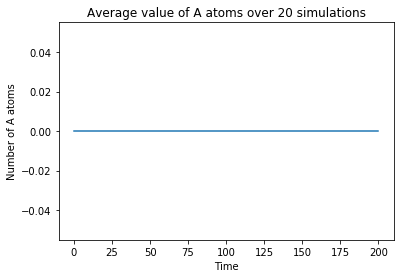

In [27]:
nsim = 20
nsteps = 200
t_total = 100
t_half_A = 10.1
t_half_B = 15.7
t_half_C = 3.2
fluxrules = [
    ('A', 'B', prob_finder(t_half_A,t_total,nsteps)),
    ('B', 'C', prob_finder(t_half_B,t_total,nsteps)),
    ('C', 'A', prob_finder(t_half_C,t_total,nsteps))
]
nofluxrules = [
    ('A', 'B', prob_finder(t_half_A,t_total,nsteps)),
    ('B', 'C', prob_finder(t_half_B,t_total,nsteps)), 
]
xvalues = numpy.linspace(0,t_total*2,num=(nsteps*2)+2)
def onefunction():
    Atotal = numpy.zeros((nsteps*2)+2)
    Btotal = numpy.zeros((nsteps*2)+2)
    Ctotal = numpy.zeros((nsteps*2)+2)
    y1,y2,y3 = evolve_system(0,0,250, fluxrules, nsteps)
    y4,y5,y6 = evolve_system(y1[nsteps],y2[nsteps],y3[nsteps], nofluxrules, nsteps)
    yvaluesA = [*y1,*y4]
    return Atotal
def pointvalues(index):
    arrayofA = numpy.empty((nsteps*2)+2)
    Apoint = numpy.zeros(nsim)
    for i in range(0,nsim):
        a = onefunction()
        arrayofA = numpy.vstack([arrayofA,a])
    numpy.delete(arrayofA, 0,0)
    for i in range(0,nsim):
        Apoint = numpy.append(Apoint, arrayofA[i][index])
    return Apoint
def averagepoints(points):
    return numpy.average(points)
def stdpoints(points):
    return numpy.std(points)
yvaluesaverage = numpy.zeros((nsteps*2)+2)
yvaluesstd = numpy.zeros((nsteps*2)+2)
for i in range(0,(nsteps*2)+2):
    yvaluesaverage[i] = averagepoints(pointvalues([i]))
    yvaluesstd[i] = stdpoints(pointvalues([i]))
    print(i)
plt.errorbar(xvalues,yvaluesaverage,xerr=0,yerr=yvaluesstd)
plt.title("Average value of A atoms over 20 simulations")
plt.xlabel("Time")
plt.ylabel("Number of A atoms")